# Importing

---



---



In [ ]:
import torch, torchvision, PIL, numpy as np
import pathlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm.auto import tqdm
from scipy.io import loadmat
import pandas as pd
import os
torch.manual_seed(0)
np.random.seed(0)

# Creating Our Dataset 

---



---



We used the Car Dataset provided by Stanford AI Labs which contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

**Downloading and Unzipping the Devkit**

---



In [ ]:
!wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
!tar xf car_devkit.tgz

--2021-05-11 16:23:21--  https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz’

car_devkit.tgz      100%[===================>] 323.20K   420KB/s    in 0.8s    

2021-05-11 16:23:22 (420 KB/s) - ‘car_devkit.tgz’ saved [330960/330960]



**Downloading and Unzipping the Training dataset images**

---

In [ ]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
!tar xf cars_train.tgz

--2021-05-11 16:23:22--  http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  15.3MB/s    in 65s     

2021-05-11 16:24:28 (14.3 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



**Downloading and Unzipping the Testing dataset images**

---

In [ ]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_test.tgz
!tar xf cars_test.tgz

--2021-05-11 16:24:39--  http://ai.stanford.edu/~jkrause/car196/cars_test.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977350468 (932M) [application/x-gzip]
Saving to: ‘cars_test.tgz’

cars_test.tgz       100%[===================>] 932.07M  5.40MB/s    in 3m 15s  

2021-05-11 16:27:54 (4.78 MB/s) - ‘cars_test.tgz’ saved [977350468/977350468]



**Downloading the Labeled Testing dataset .mat file**

---

In [ ]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_test_annos_withlabels.mat

--2021-05-11 16:28:05--  http://ai.stanford.edu/~jkrause/car196/cars_test_annos_withlabels.mat
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185758 (181K) [text/plain]
Saving to: ‘cars_test_annos_withlabels.mat’

cars_test_annos_wit 100%[===================>] 181.40K   384KB/s    in 0.5s    

2021-05-11 16:28:06 (384 KB/s) - ‘cars_test_annos_withlabels.mat’ saved [185758/185758]



In [ ]:
%ls devkit

cars_meta.mat        cars_train_annos.mat  README.txt
cars_test_annos.mat  eval_train.m          train_perfect_preds.txt


In [ ]:
f = open("devkit/README.txt", "r")
print(f.read())

This file gives documentation for the cars 196 dataset.
(http://ai.stanford.edu/~jkrause/cars/car_dataset.html)

----------------------------------------
Metadata/Annotations
----------------------------------------
Descriptions of the files are as follows:

-cars_meta.mat:
  Contains a cell array of class names, one for each class.

-cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:
    bbox_x1: Min x-value of the bounding box, in pixels
    bbox_x2: Max x-value of the bounding box, in pixels
    bbox_y1: Min y-value of the bounding box, in pixels
    bbox_y2: Max y-value of the bounding box, in pixels
    class: Integral id of the class the image belongs to.
    fname: Filename of the image within the folder of images.

-cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.

----------------------------------------
Submission file format
---------

**Loading .mat files into Python**

---



In [ ]:
cars_meta = loadmat('devkit/cars_meta.mat')
cars_train_annos = loadmat('devkit/cars_train_annos.mat')
cars_test_annos_withlabels = loadmat('cars_test_annos_withlabels.mat')

**Converting Class Labels into a Dictionary**

---

In [ ]:
label = [car for car in cars_meta['class_names'][0]]
label = pd.DataFrame(label, columns = ['Model'])
labels_dict = label.to_dict()['Model']
for key, value in labels_dict.items() :
    key = int(key)
    value = str(value)

In [ ]:
labels_dict

{0: 'AM General Hummer SUV 2000',
 1: 'Acura RL Sedan 2012',
 2: 'Acura TL Sedan 2012',
 3: 'Acura TL Type-S 2008',
 4: 'Acura TSX Sedan 2012',
 5: 'Acura Integra Type R 2001',
 6: 'Acura ZDX Hatchback 2012',
 7: 'Aston Martin V8 Vantage Convertible 2012',
 8: 'Aston Martin V8 Vantage Coupe 2012',
 9: 'Aston Martin Virage Convertible 2012',
 10: 'Aston Martin Virage Coupe 2012',
 11: 'Audi RS 4 Convertible 2008',
 12: 'Audi A5 Coupe 2012',
 13: 'Audi TTS Coupe 2012',
 14: 'Audi R8 Coupe 2012',
 15: 'Audi V8 Sedan 1994',
 16: 'Audi 100 Sedan 1994',
 17: 'Audi 100 Wagon 1994',
 18: 'Audi TT Hatchback 2011',
 19: 'Audi S6 Sedan 2011',
 20: 'Audi S5 Convertible 2012',
 21: 'Audi S5 Coupe 2012',
 22: 'Audi S4 Sedan 2012',
 23: 'Audi S4 Sedan 2007',
 24: 'Audi TT RS Coupe 2012',
 25: 'BMW ActiveHybrid 5 Sedan 2012',
 26: 'BMW 1 Series Convertible 2012',
 27: 'BMW 1 Series Coupe 2012',
 28: 'BMW 3 Series Sedan 2012',
 29: 'BMW 3 Series Wagon 2012',
 30: 'BMW 6 Series Convertible 2007',
 31: '

**Matching the Images to their respective Class for the Training Dataset**

---

In [ ]:
lable_train_list = list()
for car in cars_train_annos['annotations'][0]:
    lable_train_list.append((car[-1].item()[-9:], car[-2].item()-1))

lable_train_df = pd.DataFrame(lable_train_list)

In [ ]:
lable_train_df

,0,1
0,00001.jpg,13
1,00002.jpg,2
2,00003.jpg,90
3,00004.jpg,133
4,00005.jpg,105
...,...,...
8139,08140.jpg,77
8140,08141.jpg,195
8141,08142.jpg,162
8142,08143.jpg,111


**Matching the Images to their Class for the Testing Dataset**

---

In [ ]:
lable_test_list = list()
for car in cars_test_annos_withlabels['annotations'][0]:
    lable_test_list.append((car[-1].item()[-9:], car[-2].item()-1))

lable_test_df = pd.DataFrame(lable_test_list)

In [ ]:
lable_test_df

,0,1
0,00001.jpg,180
1,00002.jpg,102
2,00003.jpg,144
3,00004.jpg,186
4,00005.jpg,184
...,...,...
8036,08037.jpg,62
8037,08038.jpg,15
8038,08039.jpg,16
8039,08040.jpg,37


Splitting the Testing Set to Validation and Prediction Sets.

---



---



In [ ]:
%mkdir cars_validation

In [ ]:
for i in range(1, 2051):
    if (i<10):
      old = 'cars_test/0000' + str(i) + '.jpg'
      new = 'cars_validation/0000' + str(i) + '.jpg'
    elif (i<100):
      old = 'cars_test/000' + str(i) + '.jpg'
      new = 'cars_validation/000' + str(i) + '.jpg'
    elif (i<1000):
      old = 'cars_test/00' + str(i) + '.jpg'
      new = 'cars_validation/00' + str(i) + '.jpg'
    else:
      old = 'cars_test/0' + str(i) + '.jpg'
      new = 'cars_validation/0' + str(i) + '.jpg'
    os.rename(old,new)

In [ ]:
lable_validation_list = list()
for image in os.listdir('cars_validation'):
    row = lable_test_list[int(image[:5])-1]
    lable_validation_list.append(row)
   
lable_validation_list.sort()

In [ ]:
lable_validation_df = pd.DataFrame(lable_validation_list)

In [ ]:
lable_validation_df

,0,1
0,00001.jpg,180
1,00002.jpg,102
2,00003.jpg,144
3,00004.jpg,186
4,00005.jpg,184
...,...,...
2045,02046.jpg,17
2046,02047.jpg,75
2047,02048.jpg,124
2048,02049.jpg,76


In [ ]:
lable_pred_list = lable_test_list[2050:]
lable_pred_list.sort()
lable_pred_df = pd.DataFrame(lable_pred_list)

In [ ]:
lable_pred_df

,0,1
0,02051.jpg,62
1,02052.jpg,114
2,02053.jpg,83
3,02054.jpg,110
4,02055.jpg,24
...,...,...
5986,08037.jpg,62
5987,08038.jpg,15
5988,08039.jpg,16
5989,08040.jpg,37


In [ ]:
print(len(os.listdir("cars_train")))
print(len(os.listdir("cars_test")))

8144
5991


# The Dataset Class

---



---



In [ ]:
class CarDataset:
    def __init__(self, root_dir, lables, transform=None):
        self.root_dir = root_dir
        self.lables = lables
        self.transform = transform
        
    def __len__(self):
        return len(os.listdir(self.root_dir))
    
    def __getitem__(self, i):
        items = os.listdir(self.root_dir)
        row = self.lables[i]
        img_id = row[0]
        img_label = row[1]
        img_path = os.path.join(str(self.root_dir), str(img_id))
        img = PIL.Image.open(img_path).convert('RGB')        
        if self.transform:
            img = self.transform(img)
        return img, img_label

In [ ]:
xform_train = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)), torchvision.transforms.RandomHorizontalFlip(), torchvision.transforms.RandomRotation(30), torchvision.transforms.ToTensor()])
xform_test = torchvision.transforms.Compose([torchvision.transforms.Resize((224,224)), torchvision.transforms.ToTensor()])

In [ ]:
dataset_train = CarDataset('cars_train', lable_train_list, xform_train)
dataset_test = CarDataset('cars_validation', lable_test_list, xform_test)

In [ ]:
print(len(dataset_train))
print(len(dataset_test))

8144
2050


Rolls-Royce Ghost Sedan 2012


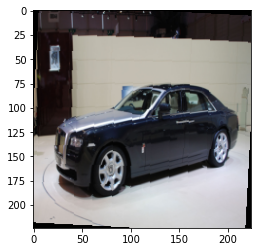

In [ ]:
label = labels_dict[dataset_train[1500][1]]
print(label)
plt.imshow(dataset_train[1500][0].permute(1, 2, 0))
plt.show()

Lamborghini Reventon Coupe 2008


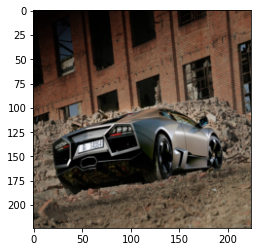

In [ ]:
label = labels_dict[dataset_test[800][1]]
print(label)
plt.imshow(dataset_test[800][0].permute(1, 2, 0))
plt.show()

In [ ]:
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=False)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=32, shuffle=False)

#Creating, Training and Testing the ResNet50 Model

---



---



In [ ]:
path = '/content/drive/MyDrive/trained_model'
save_path = os.path.join(path, 'carML.pt')

In [ ]:
def run_test(model, criterion):
    nsamples_test = len(dataset_test)
    loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for samples, labels in loader_test:
            samples = samples.to(device)
            labels = labels.to(device)
            outs = model(samples)
            loss += criterion(outs, labels)
            _, preds = torch.max(outs.detach(), 1)
            correct_mask = preds == labels
            correct += correct_mask.sum(0).item()
    return loss / nsamples_test, correct / nsamples_test

def run_train(model, criterion, opt, sched):
    nsamples_train = len(dataset_train)
    loss_sofar, correct_sofar = 0, 0
    model.train()
    with torch.enable_grad():
        for samples, labels in loader_train:
            samples = samples.to(device)
            labels = labels.to(device)
            opt.zero_grad()
            outs = model(samples)
            _, preds = torch.max(outs.detach(), 1)
            loss = criterion(outs, labels)
            loss.backward()
            opt.step()
            loss_sofar += loss.item() * samples.size(0)
            correct_sofar += torch.sum(preds == labels.detach())
    sched.step()
    return loss_sofar / nsamples_train, correct_sofar / nsamples_train

def run_all(model, criterion, optimizer, scheduler, n_epochs):
    max_acc = 0.2
    for epoch in range(n_epochs):
        loss_train, acc_train = run_train(model, criterion, optimizer, scheduler)
        loss_test, acc_test = run_test(model, criterion)
        if acc_test > max_acc:
            max_acc = acc_test
            torch.save(model.state_dict(), save_path)
            # please mount google drive before this so that the .pt file can be saved
        print(f"epoch {epoch}: train loss {loss_train:.4f} acc {acc_train:.4f}, test loss {loss_test:.4f} acc {acc_test:.4f}")

In [ ]:
model = torchvision.models.resnet50(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 196)
torch.nn.init.xavier_uniform_(model.fc.weight)

device = torch.device('cuda:0')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
run_all(model, criterion, optimizer, scheduler, 10)

epoch 0: train loss 4.0079 acc 0.1498, test loss 0.0995 acc 0.2624
epoch 1: train loss 2.1408 acc 0.4359, test loss 0.0707 acc 0.4332
epoch 2: train loss 1.3365 acc 0.6216, test loss 0.0494 acc 0.5693
epoch 3: train loss 0.8935 acc 0.7423, test loss 0.0412 acc 0.6307
epoch 4: train loss 0.6547 acc 0.8028, test loss 0.0451 acc 0.6380
epoch 5: train loss 0.2984 acc 0.9202, test loss 0.0198 acc 0.8220
epoch 6: train loss 0.1675 acc 0.9628, test loss 0.0186 acc 0.8337
epoch 7: train loss 0.1360 acc 0.9724, test loss 0.0179 acc 0.8332
epoch 8: train loss 0.1136 acc 0.9779, test loss 0.0178 acc 0.8376
epoch 9: train loss 0.1011 acc 0.9812, test loss 0.0174 acc 0.8420


# Optimization Table for the Learning Process
---



---



| learning rate | momentum | step size | gamma | minibatch | train acc | test acc |
|---------------|----------|-----------|-------|-----------|----------|----------|
| 0.001 | 0.9 | 3 | 0.1 | 32 | 0.7680 | 0.4356 |
| 0.01 | 0.9 | 3 | 0.1 | 32 | 0.9442 | 0.7290 |
| 0.01 | 0.9 | 5 | 0.1 | 32 | 0.9710 | 0.7585 |
| 0.01 | 0.9 | 5 | 0.1 | 64 | 0.7545 | 0.4622 |
| 0.01 | 0.5 | 5 | 0.1 | 16 | 0.9183 | 0.7198 |


Using ResNet18 caused the model to overfit everytime, even on changinf parameters, after doing some research we decided to use ResNet50 model instead of ResNet18 model.

# Prediction using the Trained Model

---



---



In [ ]:
def predict_image(img):
    model.eval()
    print('actual: {}'.format(labels_dict[img[1]]))
    # Convert to a batch of 1
    xb = to_device(img[0].unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb.data, dim=1)
    # Retrieve the class label
    return labels_dict[preds[0].item()]

In [ ]:
def to_device(tensorss, device):
    '''Move tensor to chosen device'''
    if isinstance(tensorss, (list, tuple)):
        return [to_device(x, device) for x in tensorss]
    return tensorss.to(device, non_blocking = True)

In [ ]:
def show_img(img):
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

actual: Chrysler Town and Country Minivan 2012
predicted: Chrysler Town and Country Minivan 2012


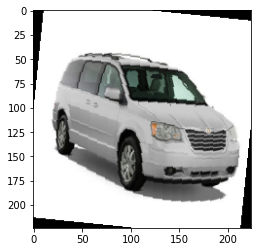

In [ ]:
img = dataset_test[5]
print('predicted: {}'.format(predict_image(img)))
show_img(img[0])

actual: Buick Verano Sedan 2012
predicted: Buick Verano Sedan 2012


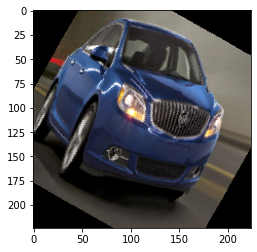

In [ ]:
img = dataset_test[10]
print('predicted: {}'.format(predict_image(img)))
show_img(img[0])

actual: Hyundai Genesis Sedan 2012
predicted: Hyundai Genesis Sedan 2012


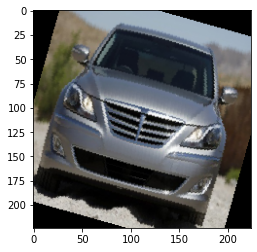

In [ ]:
img = dataset_test[50]
print('predicted: {}'.format(predict_image(img)))
show_img(img[0])

actual: Toyota 4Runner SUV 2012
predicted: Toyota 4Runner SUV 2012


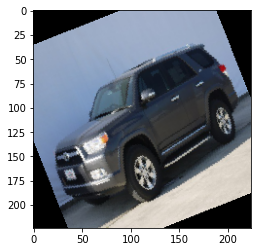

In [ ]:
img = dataset_test[100]
print('predicted: {}'.format(predict_image(img)))
show_img(img[0])

actual: Dodge Ram Pickup 3500 Crew Cab 2010
predicted: Dodge Ram Pickup 3500 Crew Cab 2010


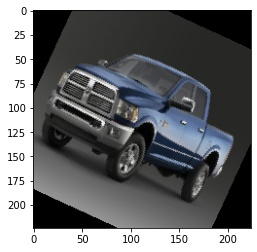

In [ ]:
img = dataset_test[500]
print('predicted: {}'.format(predict_image(img)))
show_img(img[0])

actual: Ford F-450 Super Duty Crew Cab 2012
predicted: Ford F-450 Super Duty Crew Cab 2012


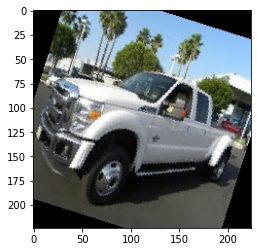

In [ ]:
img = dataset_test[5000]
print('predicted: {}'.format(predict_image(img)))
show_img(img[0])

# Saving or Loading the Trained Model

---



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive',)

Mounted at /content/drive


In [ ]:
%mkdir /content/drive/MyDrive/trained_model

In [ ]:
path = '/content/drive/MyDrive/trained_model'
save_path = os.path.join(path, 'carML.pt')

In [ ]:
torch.save(model.state_dict(), save_path)

In [ ]:
model = torchvision.models.resnet50(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 196)
model.load_state_dict(torch.load(PATH))

# Citation

---



---



3D Object Representations for Fine-Grained Categorization

>Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei
>
>4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.J
